In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [2]:
# 读取数据
all_data = pd.read_csv('data_1.csv')
x,y = all_data.loc[:,all_data.columns!='Tc.1'],all_data.loc[:,"Tc.1"]
y.loc[y<=1] = 0
y.loc[y>=1] = 1

/tmp/ipykernel_3444/3581831477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y<=1] = 0
/tmp/ipykernel_3444/3581831477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y>=1] = 1


In [3]:
# 选择需要进行PCA的特征
def perform_pca(data, n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    transformed_data = pca.transform(data)
    return transformed_data

x = perform_pca(x, 3)

In [4]:
#划分数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=87)

In [5]:
#如果不想标准化的话，使用此代码
X_train_scaled = x_train
X_test_scaled = x_test

In [6]:
# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [7]:

# 创建KNN模型
knn = KNeighborsClassifier()

# 训练
knn.fit(X_train_scaled, y_train.astype('str'))
# 测试
print(knn.score(X_test_scaled, y_test.astype('str')))
print(knn.score(X_train_scaled, y_train.astype('str')))
# 正确率
y_pred=knn.predict(X_test_scaled)
accuracy = accuracy_score(y_pred, y_test.astype('str'))
print("Accuracy:", accuracy)



0.9622197836651513
0.972453641494222
Accuracy: 0.9622197836651513


['1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0', '1.0']


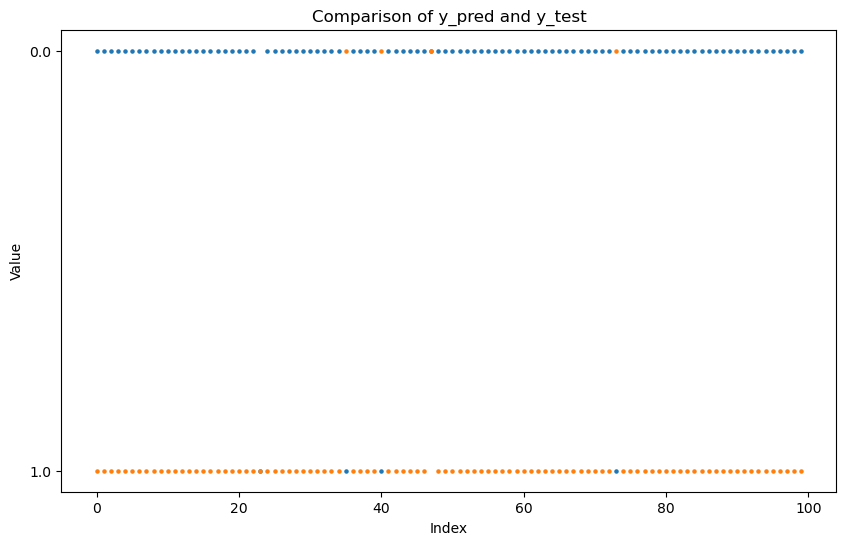

In [8]:
indexs=range(200)
lst=random.sample(indexs,100)
y_pred_sample=[]
y_test_sample=[]
for i in lst:
    y_pred_sample.append(y_pred[i])
    y_test_sample.append(y_test.iloc[i])
print(y_pred_sample)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sample)),y_test_sample, label='Actual',s=5)
plt.scatter(range(len(y_test_sample)),y_pred_sample, label='Predicted',s=5)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of y_pred and y_test')
plt.show()


In [9]:
pd.DataFrame(X_train_scaled).to_csv('X_train_scaled.csv')
pd.DataFrame(X_test_scaled).to_csv('X_test_scaled.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')
y_pred = knn.predict(X_test_scaled)
np.savetxt('y_pred.txt', y_pred, fmt='%s')
np.savetxt('y_test.txt', y_test, fmt='%s')